In [2]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import ADASYN

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

import pickle

# Processing the Data

In [3]:
data = pd.read_csv('corpus.csv')
data

,Unnamed: 0,text,source,text_length,word_count,Prompt,lexical_diversity,avg_sentence_length,readability_score,char_count,...,embedding_40,embedding_41,embedding_42,embedding_43,embedding_44,embedding_45,embedding_46,embedding_47,embedding_48,embedding_49
0,0,"Federal law supersedes state law, and cannabis...",Bloom-7B,967,181,Undefined,0.806630,25.857143,57.30,967,...,-0.035092,-0.001925,-0.041666,-0.005266,0.034543,0.002532,-0.071304,0.014727,-0.012865,0.004744
1,1,Miles feels restless after working all day. He...,Bloom-7B,5068,924,Undefined,0.661255,23.100000,53.21,5068,...,-0.003091,-0.043269,0.003721,-0.005574,0.030584,-0.006616,0.030465,0.000941,0.020913,0.060853
2,2,So first of I am danish. That means that I fol...,Bloom-7B,1602,316,Undefined,0.718354,22.571429,61.97,1602,...,0.011013,-0.008409,0.008066,-0.012316,0.007549,-0.000401,-0.001133,-0.005499,-0.011693,0.000179
3,3,In this paper we present a novel rule-based ap...,Bloom-7B,5469,1015,Undefined,0.564532,40.600000,27.86,5469,...,-0.018165,0.012030,-0.020475,-0.006033,0.002823,-0.000594,0.000835,0.001109,0.009936,-0.019899
4,4,"Most social progressives, love democracy, and ...",Bloom-7B,2379,437,Undefined,0.752860,23.000000,61.67,2379,...,0.004131,0.014534,0.007382,-0.016189,0.007070,0.001430,-0.017871,0.004868,0.010563,0.008097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
788917,788917,"\nIn the vast expanse of time, where the echoe...",YI-34B,5523,951,The Ethics of De-extinction and Bringing Back ...,0.420610,28.818182,36.22,5523,...,-0.005222,-0.001365,-0.020148,-0.023085,-0.030199,-0.012152,0.002733,-0.000128,0.022612,-0.007202
788918,788918,"\nThe phenomenon of brain drain, particularly ...",YI-34B,4540,761,The Economic and Social Consequences of Brain ...,0.395532,28.185185,29.08,4540,...,-0.006157,-0.023404,0.037557,0.026361,-0.008231,0.023823,-0.009165,-0.004096,-0.016606,0.020802
788919,788919,\nThe Influence of Climate Change on Marine Ec...,YI-34B,3889,670,The influence of climate change on marine ecos...,0.447761,26.800000,47.22,3889,...,0.010574,-0.008166,0.018903,-0.001044,-0.037097,0.025732,0.039127,0.018915,0.072912,-0.009205
788920,788920,\nTitle: The Case for Limiting Car Usage: Navi...,YI-34B,3560,592,Write an explanatory essay to inform fellow ci...,0.476351,28.190476,28.77,3560,...,0.013639,0.035284,0.000662,0.023736,0.030208,0.013736,-0.011754,-0.010964,0.000265,0.014060


In [4]:
data.drop(['Unnamed: 0', 'text', 'text_length', 'word_count', 'Prompt', 'avg_sentence_length', 'classification', 'char_count'], axis=1, inplace=True)
data

,source,lexical_diversity,readability_score,sentence_count,prompt_length,embedding_0,embedding_1,embedding_2,embedding_3,embedding_4,...,embedding_40,embedding_41,embedding_42,embedding_43,embedding_44,embedding_45,embedding_46,embedding_47,embedding_48,embedding_49
0,Bloom-7B,0.806630,57.30,7,9,0.008560,0.095722,-0.049095,-0.118440,-0.004019,...,-0.035092,-0.001925,-0.041666,-0.005266,0.034543,0.002532,-0.071304,0.014727,-0.012865,0.004744
1,Bloom-7B,0.661255,53.21,40,9,0.070761,-0.099866,0.107777,0.008168,-0.063522,...,-0.003091,-0.043269,0.003721,-0.005574,0.030584,-0.006616,0.030465,0.000941,0.020913,0.060853
2,Bloom-7B,0.718354,61.97,14,9,0.164173,0.117847,-0.012992,0.088472,0.097658,...,0.011013,-0.008409,0.008066,-0.012316,0.007549,-0.000401,-0.001133,-0.005499,-0.011693,0.000179
3,Bloom-7B,0.564532,27.86,25,9,-0.179447,0.010308,0.155961,0.029293,0.099195,...,-0.018165,0.012030,-0.020475,-0.006033,0.002823,-0.000594,0.000835,0.001109,0.009936,-0.019899
4,Bloom-7B,0.752860,61.67,19,9,0.159706,0.083560,-0.074277,0.031704,0.066774,...,0.004131,0.014534,0.007382,-0.016189,0.007070,0.001430,-0.017871,0.004868,0.010563,0.008097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
788917,YI-34B,0.420610,36.22,33,61,-0.157033,-0.008564,-0.079678,0.104863,-0.095362,...,-0.005222,-0.001365,-0.020148,-0.023085,-0.030199,-0.012152,0.002733,-0.000128,0.022612,-0.007202
788918,YI-34B,0.395532,29.08,27,66,-0.282313,0.034885,-0.078380,-0.014602,-0.034506,...,-0.006157,-0.023404,0.037557,0.026361,-0.008231,0.023823,-0.009165,-0.004096,-0.016606,0.020802
788919,YI-34B,0.447761,47.22,25,52,-0.264905,-0.011840,0.106972,0.034591,-0.192508,...,0.010574,-0.008166,0.018903,-0.001044,-0.037097,0.025732,0.039127,0.018915,0.072912,-0.009205
788920,YI-34B,0.476351,28.77,21,512,-0.263766,0.064379,-0.021544,-0.112702,-0.044006,...,0.013639,0.035284,0.000662,0.023736,0.030208,0.013736,-0.011754,-0.010964,0.000265,0.014060


In [5]:
# Encoding the categorical values

In [6]:
encode = LabelEncoder()
encode.fit(data['source'])

LabelEncoder()

In [7]:
encodedSource = encode.transform(data['source'])
encodedSource

array([ 0,  0,  0, ..., 62, 62, 62])

In [8]:
dataSeries = pd.Series(encodedSource)
dataSeries

0          0
1          0
2          0
3          0
4          0
          ..
788917    62
788918    62
788919    62
788920    62
788921    62
Length: 788922, dtype: int64

In [9]:
data['sourceEncoded'] = dataSeries
data

,source,lexical_diversity,readability_score,sentence_count,prompt_length,embedding_0,embedding_1,embedding_2,embedding_3,embedding_4,...,embedding_41,embedding_42,embedding_43,embedding_44,embedding_45,embedding_46,embedding_47,embedding_48,embedding_49,sourceEncoded
0,Bloom-7B,0.806630,57.30,7,9,0.008560,0.095722,-0.049095,-0.118440,-0.004019,...,-0.001925,-0.041666,-0.005266,0.034543,0.002532,-0.071304,0.014727,-0.012865,0.004744,0
1,Bloom-7B,0.661255,53.21,40,9,0.070761,-0.099866,0.107777,0.008168,-0.063522,...,-0.043269,0.003721,-0.005574,0.030584,-0.006616,0.030465,0.000941,0.020913,0.060853,0
2,Bloom-7B,0.718354,61.97,14,9,0.164173,0.117847,-0.012992,0.088472,0.097658,...,-0.008409,0.008066,-0.012316,0.007549,-0.000401,-0.001133,-0.005499,-0.011693,0.000179,0
3,Bloom-7B,0.564532,27.86,25,9,-0.179447,0.010308,0.155961,0.029293,0.099195,...,0.012030,-0.020475,-0.006033,0.002823,-0.000594,0.000835,0.001109,0.009936,-0.019899,0
4,Bloom-7B,0.752860,61.67,19,9,0.159706,0.083560,-0.074277,0.031704,0.066774,...,0.014534,0.007382,-0.016189,0.007070,0.001430,-0.017871,0.004868,0.010563,0.008097,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
788917,YI-34B,0.420610,36.22,33,61,-0.157033,-0.008564,-0.079678,0.104863,-0.095362,...,-0.001365,-0.020148,-0.023085,-0.030199,-0.012152,0.002733,-0.000128,0.022612,-0.007202,62
788918,YI-34B,0.395532,29.08,27,66,-0.282313,0.034885,-0.078380,-0.014602,-0.034506,...,-0.023404,0.037557,0.026361,-0.008231,0.023823,-0.009165,-0.004096,-0.016606,0.020802,62
788919,YI-34B,0.447761,47.22,25,52,-0.264905,-0.011840,0.106972,0.034591,-0.192508,...,-0.008166,0.018903,-0.001044,-0.037097,0.025732,0.039127,0.018915,0.072912,-0.009205,62
788920,YI-34B,0.476351,28.77,21,512,-0.263766,0.064379,-0.021544,-0.112702,-0.044006,...,0.035284,0.000662,0.023736,0.030208,0.013736,-0.011754,-0.010964,0.000265,0.014060,62


In [31]:
labels = data.groupby(['source', 'sourceEncoded']).count()
labels.head(60)

,,lexical_diversity,readability_score,sentence_count,prompt_length,embedding_0,embedding_1,embedding_2,embedding_3,embedding_4,embedding_5,...,embedding_40,embedding_41,embedding_42,embedding_43,embedding_44,embedding_45,embedding_46,embedding_47,embedding_48,embedding_49
source,sourceEncoded,,,,,,,,,,,,,,,,,,,,,
Bloom-7B,0,8812,8812,8812,8812,8812,8812,8812,8812,8812,8812,...,8812,8812,8812,8812,8812,8812,8812,8812,8812,8812
Claude-Instant-v1,1,7147,7147,7147,7147,7147,7147,7147,7147,7147,7147,...,7147,7147,7147,7147,7147,7147,7147,7147,7147,7147
Claude-v1,2,3158,3158,3158,3158,3158,3158,3158,3158,3158,3158,...,3158,3158,3158,3158,3158,3158,3158,3158,3158,3158
Cohere-Command,3,390,390,390,390,390,390,390,390,390,390,...,390,390,390,390,390,390,390,390,390,390
Dolphin-2.5-Mixtral-8x7B,4,228,228,228,228,228,228,228,228,228,228,...,228,228,228,228,228,228,228,228,228,228
Dolphin-Mixtral-8x7B,5,407,407,407,407,407,407,407,407,407,407,...,407,407,407,407,407,407,407,407,407,407
Falcon-180B,6,4745,4745,4745,4745,4745,4745,4745,4745,4745,4745,...,4745,4745,4745,4745,4745,4745,4745,4745,4745,4745
Flan-T5-Base,7,9201,9201,9201,9201,9201,9201,9201,9201,9201,9201,...,9201,9201,9201,9201,9201,9201,9201,9201,9201,9201
Flan-T5-Large,8,9164,9164,9164,9164,9164,9164,9164,9164,9164,9164,...,9164,9164,9164,9164,9164,9164,9164,9164,9164,9164


In [9]:
data.drop(['source'], axis=1, inplace=True)
data

,lexical_diversity,readability_score,sentence_count,prompt_length,embedding_0,embedding_1,embedding_2,embedding_3,embedding_4,embedding_5,...,embedding_41,embedding_42,embedding_43,embedding_44,embedding_45,embedding_46,embedding_47,embedding_48,embedding_49,sourceEncoded
0,0.806630,57.30,7,9,0.008560,0.095722,-0.049095,-0.118440,-0.004019,0.043696,...,-0.001925,-0.041666,-0.005266,0.034543,0.002532,-0.071304,0.014727,-0.012865,0.004744,0
1,0.661255,53.21,40,9,0.070761,-0.099866,0.107777,0.008168,-0.063522,0.097034,...,-0.043269,0.003721,-0.005574,0.030584,-0.006616,0.030465,0.000941,0.020913,0.060853,0
2,0.718354,61.97,14,9,0.164173,0.117847,-0.012992,0.088472,0.097658,-0.002207,...,-0.008409,0.008066,-0.012316,0.007549,-0.000401,-0.001133,-0.005499,-0.011693,0.000179,0
3,0.564532,27.86,25,9,-0.179447,0.010308,0.155961,0.029293,0.099195,-0.101426,...,0.012030,-0.020475,-0.006033,0.002823,-0.000594,0.000835,0.001109,0.009936,-0.019899,0
4,0.752860,61.67,19,9,0.159706,0.083560,-0.074277,0.031704,0.066774,0.062544,...,0.014534,0.007382,-0.016189,0.007070,0.001430,-0.017871,0.004868,0.010563,0.008097,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
788917,0.420610,36.22,33,61,-0.157033,-0.008564,-0.079678,0.104863,-0.095362,0.039880,...,-0.001365,-0.020148,-0.023085,-0.030199,-0.012152,0.002733,-0.000128,0.022612,-0.007202,62
788918,0.395532,29.08,27,66,-0.282313,0.034885,-0.078380,-0.014602,-0.034506,0.077010,...,-0.023404,0.037557,0.026361,-0.008231,0.023823,-0.009165,-0.004096,-0.016606,0.020802,62
788919,0.447761,47.22,25,52,-0.264905,-0.011840,0.106972,0.034591,-0.192508,0.167850,...,-0.008166,0.018903,-0.001044,-0.037097,0.025732,0.039127,0.018915,0.072912,-0.009205,62
788920,0.476351,28.77,21,512,-0.263766,0.064379,-0.021544,-0.112702,-0.044006,0.123673,...,0.035284,0.000662,0.023736,0.030208,0.013736,-0.011754,-0.010964,0.000265,0.014060,62


In [10]:
data.drop(['sentence_count', 'prompt_length'], axis=1, inplace=True)

In [11]:
# Shuffling the dataset

In [12]:
data = data.sample(frac=1, ignore_index=True)

In [13]:
data

,lexical_diversity,readability_score,embedding_0,embedding_1,embedding_2,embedding_3,embedding_4,embedding_5,embedding_6,embedding_7,...,embedding_41,embedding_42,embedding_43,embedding_44,embedding_45,embedding_46,embedding_47,embedding_48,embedding_49,sourceEncoded
0,0.347368,63.80,-0.014933,-0.038845,-0.158053,0.004646,-0.042694,0.012060,-0.054245,0.000397,...,-0.002275,0.044455,-0.010944,0.006498,0.010042,-0.015255,-0.014940,-0.025007,0.015603,19
1,0.541850,74.90,0.217244,-0.104750,0.027835,0.139416,-0.114102,-0.058512,0.028179,0.040548,...,0.003751,0.010945,-0.003890,0.028801,0.005993,-0.012156,-0.046456,-0.001898,-0.016560,19
2,0.287444,50.46,-0.087677,-0.055495,-0.086990,-0.088636,0.046496,-0.093805,-0.117377,0.063579,...,-0.046124,-0.024574,0.012555,-0.005401,0.023001,-0.054847,-0.023912,0.021516,0.001037,19
3,0.820896,81.83,0.218941,0.041171,0.088468,-0.016718,-0.048112,0.088717,0.053958,-0.093942,...,0.011755,0.023686,0.010145,-0.022993,0.001508,-0.032522,0.050134,0.014272,0.004789,19
4,0.563025,58.62,0.012391,0.250100,0.019483,-0.127520,0.041142,0.128489,-0.001994,-0.089824,...,-0.028753,-0.013274,0.004695,0.027242,-0.008143,0.025566,-0.036693,-0.029620,0.075345,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
788917,0.293269,84.88,0.351386,0.202890,0.017317,0.103853,0.129875,0.044663,-0.118230,0.100095,...,-0.012970,0.028894,0.008365,0.023248,0.007646,-0.014508,0.028956,-0.005257,-0.009287,20
788918,0.448795,44.58,-0.193499,-0.113607,0.015833,0.152694,-0.143946,-0.001185,0.016983,-0.154293,...,0.028422,-0.003345,0.000912,0.020102,0.026419,0.010614,-0.017537,-0.016065,-0.017739,44
788919,0.862745,72.87,0.047090,-0.202783,-0.112934,-0.196180,-0.037219,-0.073335,-0.025841,0.035394,...,-0.063111,0.020878,-0.027317,0.011153,-0.001443,-0.016620,-0.010329,0.011247,-0.003789,41
788920,0.254355,48.54,-0.216230,-0.000708,-0.006520,-0.044850,0.029534,-0.020811,-0.040853,-0.017959,...,0.016097,-0.002862,0.019315,-0.000383,-0.005775,0.005119,-0.019875,0.008745,0.026813,19


In [14]:
# selecting only 5 LLM classes 

In [15]:
top = data['sourceEncoded'].value_counts()
top.head(10)

19    347692
13     52346
59     22860
58     21436
37     18467
41     18055
35     12686
27     10439
47      9510
44      9402
Name: sourceEncoded, dtype: int64

In [16]:
selectedDataFrame = data[data['sourceEncoded'].isin([13, 59, 58, 37, 41])]
selectedDataFrame

,lexical_diversity,readability_score,embedding_0,embedding_1,embedding_2,embedding_3,embedding_4,embedding_5,embedding_6,embedding_7,...,embedding_41,embedding_42,embedding_43,embedding_44,embedding_45,embedding_46,embedding_47,embedding_48,embedding_49,sourceEncoded
6,0.769663,26.64,-0.168179,0.077083,0.115720,0.010052,-0.051142,-0.122010,-0.025270,-0.031395,...,-0.052069,-0.041864,-0.063332,-0.004891,0.041612,-0.008916,-0.037787,-0.015231,-0.011546,37
7,0.610294,82.04,0.360020,0.061433,0.028456,0.006923,0.082802,-0.080595,-0.016215,0.032471,...,-0.004683,0.011520,0.027406,-0.013488,-0.020637,0.006689,0.026539,0.000174,0.001229,58
34,0.437086,25.08,-0.321289,0.052606,0.136353,-0.100970,-0.064315,0.103079,0.008150,-0.010910,...,-0.014132,-0.005759,-0.017750,0.017853,0.011929,0.016674,-0.001780,-0.011683,-0.030882,13
42,0.756410,63.73,0.047950,-0.143843,-0.119845,-0.056691,0.057974,0.042479,-0.160052,-0.023304,...,-0.037873,0.022945,-0.018770,0.011276,-0.014351,0.051906,0.022502,-0.017162,-0.004475,58
54,0.652174,105.45,0.330286,-0.323615,-0.138482,-0.006044,-0.104217,-0.142862,0.006063,0.200493,...,-0.016747,-0.015484,-0.006765,0.025826,0.014034,0.044829,0.073610,-0.015819,0.007446,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
788899,0.365607,31.21,-0.296132,0.014905,-0.067647,-0.007877,-0.113005,0.197896,0.071460,0.055768,...,0.022513,0.002828,0.023398,0.070388,-0.010765,0.004683,0.002490,-0.032236,0.021076,13
788901,0.498542,50.06,0.040016,-0.110140,-0.091529,0.132227,-0.052099,-0.019278,0.199577,0.016658,...,0.026841,0.002417,-0.020538,-0.029363,0.016880,-0.034594,-0.037387,0.016397,0.030583,13
788905,0.723684,65.93,0.092741,-0.373570,-0.124836,-0.192118,-0.051675,-0.119680,-0.058971,0.090961,...,-0.033691,-0.007603,-0.023790,0.041450,0.000611,0.005436,-0.003637,0.026415,-0.015854,58
788915,0.434132,77.47,0.244636,-0.060586,-0.166191,-0.000782,-0.092432,-0.070292,0.093273,0.061433,...,0.029490,0.038883,-0.023161,0.003190,-0.034493,-0.074051,-0.037351,0.006461,-0.027971,59


In [17]:
selectedDataFrame['sourceEncoded'].value_counts()

13    52346
59    22860
58    21436
37    18467
41    18055
Name: sourceEncoded, dtype: int64

In [18]:
X = selectedDataFrame.drop(['sourceEncoded'], axis=1)
X

,lexical_diversity,readability_score,embedding_0,embedding_1,embedding_2,embedding_3,embedding_4,embedding_5,embedding_6,embedding_7,...,embedding_40,embedding_41,embedding_42,embedding_43,embedding_44,embedding_45,embedding_46,embedding_47,embedding_48,embedding_49
6,0.769663,26.64,-0.168179,0.077083,0.115720,0.010052,-0.051142,-0.122010,-0.025270,-0.031395,...,0.003378,-0.052069,-0.041864,-0.063332,-0.004891,0.041612,-0.008916,-0.037787,-0.015231,-0.011546
7,0.610294,82.04,0.360020,0.061433,0.028456,0.006923,0.082802,-0.080595,-0.016215,0.032471,...,-0.029178,-0.004683,0.011520,0.027406,-0.013488,-0.020637,0.006689,0.026539,0.000174,0.001229
34,0.437086,25.08,-0.321289,0.052606,0.136353,-0.100970,-0.064315,0.103079,0.008150,-0.010910,...,-0.020540,-0.014132,-0.005759,-0.017750,0.017853,0.011929,0.016674,-0.001780,-0.011683,-0.030882
42,0.756410,63.73,0.047950,-0.143843,-0.119845,-0.056691,0.057974,0.042479,-0.160052,-0.023304,...,0.038496,-0.037873,0.022945,-0.018770,0.011276,-0.014351,0.051906,0.022502,-0.017162,-0.004475
54,0.652174,105.45,0.330286,-0.323615,-0.138482,-0.006044,-0.104217,-0.142862,0.006063,0.200493,...,-0.038150,-0.016747,-0.015484,-0.006765,0.025826,0.014034,0.044829,0.073610,-0.015819,0.007446
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
788899,0.365607,31.21,-0.296132,0.014905,-0.067647,-0.007877,-0.113005,0.197896,0.071460,0.055768,...,0.020827,0.022513,0.002828,0.023398,0.070388,-0.010765,0.004683,0.002490,-0.032236,0.021076
788901,0.498542,50.06,0.040016,-0.110140,-0.091529,0.132227,-0.052099,-0.019278,0.199577,0.016658,...,-0.018988,0.026841,0.002417,-0.020538,-0.029363,0.016880,-0.034594,-0.037387,0.016397,0.030583
788905,0.723684,65.93,0.092741,-0.373570,-0.124836,-0.192118,-0.051675,-0.119680,-0.058971,0.090961,...,-0.033102,-0.033691,-0.007603,-0.023790,0.041450,0.000611,0.005436,-0.003637,0.026415,-0.015854
788915,0.434132,77.47,0.244636,-0.060586,-0.166191,-0.000782,-0.092432,-0.070292,0.093273,0.061433,...,0.000784,0.029490,0.038883,-0.023161,0.003190,-0.034493,-0.074051,-0.037351,0.006461,-0.027971


In [19]:
y = selectedDataFrame['sourceEncoded']
y

6         37
7         58
34        13
42        58
54        59
          ..
788899    13
788901    13
788905    58
788915    59
788919    41
Name: sourceEncoded, Length: 133164, dtype: int64

# Data split for training and testing

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [21]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(106531, 52)
(26633, 52)
(106531,)
(26633,)


# Oversampling using ADASYN

In [22]:
adasyn = ADASYN()
X_oversampled, y_oversampled = adasyn.fit_resample(X_train, y_train)

In [23]:
X_oversampled

,lexical_diversity,readability_score,embedding_0,embedding_1,embedding_2,embedding_3,embedding_4,embedding_5,embedding_6,embedding_7,...,embedding_40,embedding_41,embedding_42,embedding_43,embedding_44,embedding_45,embedding_46,embedding_47,embedding_48,embedding_49
0,0.752577,40.690000,-0.204950,0.098549,-0.016005,-0.070903,0.039634,0.004938,0.005084,-0.023801,...,-0.023121,-0.054560,-0.007940,-0.017508,0.013212,-0.032671,-0.012267,-0.035420,-0.029598,0.007800
1,0.662791,82.440000,-0.091552,0.011706,0.069581,-0.237689,0.046251,0.152222,-0.004697,-0.027788,...,0.007854,0.001624,0.029759,-0.003016,0.033535,0.049674,0.005018,-0.044019,-0.002381,0.035043
2,0.556034,72.560000,0.007215,0.143419,0.000235,-0.119575,0.025752,-0.062705,0.073281,-0.067261,...,-0.016915,0.029244,0.013929,0.050985,0.004976,0.051455,0.023458,0.020656,-0.022565,0.013477
3,0.806452,37.500000,-0.330653,0.071714,0.070528,-0.030881,0.080423,-0.072295,0.080562,0.011694,...,-0.052466,0.037395,-0.012585,0.012332,0.026525,-0.045064,0.054542,-0.014237,-0.005990,0.029337
4,0.645390,54.150000,-0.025661,-0.091636,-0.210518,-0.085936,-0.003314,-0.035615,-0.094097,-0.036325,...,-0.002764,-0.009659,-0.049980,-0.026881,-0.000158,-0.028190,0.019145,-0.025257,-0.001848,0.006388
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212330,0.772524,62.380000,0.009781,0.148164,0.044331,0.010512,-0.150918,-0.039190,-0.174302,0.133292,...,0.013349,0.015207,0.014579,0.031889,0.012254,0.049691,0.019144,-0.009482,-0.015168,-0.062566
212331,0.570353,80.187572,0.250984,-0.112474,-0.129416,0.041581,-0.042187,-0.075098,0.038279,0.062097,...,0.001927,-0.005368,-0.042526,0.024095,-0.003162,0.031540,-0.001310,0.010929,-0.001356,0.011391
212332,0.743410,85.128678,0.183909,0.078467,0.034185,-0.136881,-0.045986,0.104006,0.068179,-0.091670,...,-0.000839,-0.012105,0.011661,-0.054008,0.019639,0.026192,-0.005470,-0.004956,0.024217,0.016126
212333,0.555079,48.924755,-0.165414,-0.058040,0.000044,-0.097961,0.112386,-0.001168,0.093758,-0.066165,...,-0.001467,-0.006711,-0.027500,0.011319,0.017755,-0.009610,0.008199,0.010104,-0.012979,-0.004073


In [24]:
y_oversampled.value_counts()

41    44476
37    43420
58    41920
13    41787
59    40732
Name: sourceEncoded, dtype: int64

# Random Forest Classifier

In [25]:
rf_model = RandomForestClassifier(n_estimators=200)
rf_model.fit(X_oversampled, y_oversampled)

RandomForestClassifier(n_estimators=200)

In [26]:
y_hat_rf = rf_model.predict(X_test)

print(classification_report(y_hat_rf, y_test))

              precision    recall  f1-score   support

          13       0.72      0.92      0.81      8208
          37       0.55      0.54      0.55      3691
          41       0.72      0.63      0.67      4113
          58       0.68      0.56      0.62      5229
          59       0.56      0.47      0.51      5392

    accuracy                           0.66     26633
   macro avg       0.64      0.62      0.63     26633
weighted avg       0.65      0.66      0.65     26633



In [27]:
rf_accuracy = accuracy_score(y_test, y_hat_rf)
rf_accuracy

0.6610595877295085

# Logistic Regression Classifier

In [28]:
log_reg_model = LogisticRegression(max_iter = 1000)

log_reg_model.fit(X_oversampled,y_oversampled)

/Users/cibhibaskar/Desktop/Kaggle/LLMHuman/env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [29]:
y_hat_logreg = log_reg_model.predict(X_test)

print(classification_report(y_test, y_hat_logreg))

              precision    recall  f1-score   support

          13       0.89      0.71      0.79     10559
          37       0.42      0.43      0.42      3616
          41       0.59      0.73      0.65      3627
          58       0.52      0.60      0.56      4305
          59       0.43      0.46      0.45      4526

    accuracy                           0.62     26633
   macro avg       0.57      0.59      0.57     26633
weighted avg       0.64      0.62      0.62     26633



In [30]:
logreg_accuracy = accuracy_score(y_test, y_hat_logreg)
logreg_accuracy

0.6157398715878797

# K-Nearest Neighbor Classifier

In [31]:
knn_clf_model = KNeighborsClassifier()

knn_clf_model.fit(X_oversampled, y_oversampled)

KNeighborsClassifier()

In [32]:
y_hat_knn = knn_clf_model.predict(X_test)

print(classification_report(y_test, y_hat_knn))

              precision    recall  f1-score   support

          13       0.92      0.63      0.75     10559
          37       0.28      0.48      0.35      3616
          41       0.42      0.64      0.51      3627
          58       0.48      0.40      0.44      4305
          59       0.38      0.34      0.36      4526

    accuracy                           0.53     26633
   macro avg       0.50      0.50      0.48     26633
weighted avg       0.60      0.53      0.55     26633



In [33]:
knn_accuracy = accuracy_score(y_test, y_hat_knn)
knn_accuracy

0.5252881763226073

# Multilayer Perceptron Classifier

In [34]:
mlp_model = MLPClassifier(alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.001, max_iter=1000)
mlp_model.fit(X_oversampled, y_oversampled)

MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=1000)

In [35]:
y_hat_mlp = mlp_model.predict(X_test)

print(classification_report(y_hat_mlp, y_test))

              precision    recall  f1-score   support

          13       0.75      0.93      0.83      8507
          37       0.62      0.60      0.61      3726
          41       0.69      0.71      0.70      3496
          58       0.72      0.61      0.66      5084
          59       0.63      0.49      0.55      5820

    accuracy                           0.70     26633
   macro avg       0.68      0.67      0.67     26633
weighted avg       0.69      0.70      0.69     26633



In [36]:
mlp_accuracy = accuracy_score(y_test, y_hat_mlp)
mlp_accuracy

0.6974054744114444

# Hyperparameter Tuning of MLP Model

In [37]:
'''from sklearn.model_selection import GridSearchCV

# Define hyperparameters to search

mlp_param_grid = {
    'hidden_layer_sizes': [(100,), (50, 50), (50, 100, 50)],
    'alpha': [0.0001 ,0.001, 0.01],
    'learning_rate_init': [0.001, 0.01, 0.1],
}

# Grid search with cross-validation
mlp_grid_search = GridSearchCV(mlp_model, mlp_param_grid, cv=5, scoring='accuracy', verbose=3)
mlp_grid_search.fit(X_oversampled, y_oversampled)'''

"from sklearn.model_selection import GridSearchCV\n\n# Define hyperparameters to search\n\nmlp_param_grid = {\n    'hidden_layer_sizes': [(100,), (50, 50), (50, 100, 50)],\n    'alpha': [0.0001 ,0.001, 0.01],\n    'learning_rate_init': [0.001, 0.01, 0.1],\n}\n\n# Grid search with cross-validation\nmlp_grid_search = GridSearchCV(mlp_model, mlp_param_grid, cv=5, scoring='accuracy', verbose=3)\nmlp_grid_search.fit(X_oversampled, y_oversampled)"

# Stochastic Gradient Descent (SGD) Classifier

In [38]:
sgd_model = SGDClassifier()
sgd_model.fit(X_oversampled, y_oversampled)

SGDClassifier()

In [39]:
y_hat_sgd = sgd_model.predict(X_test)

print(classification_report(y_test, y_hat_sgd))

              precision    recall  f1-score   support

          13       0.83      0.77      0.80     10559
          37       0.30      0.84      0.44      3616
          41       0.71      0.40      0.51      3627
          58       0.72      0.21      0.33      4305
          59       0.46      0.33      0.38      4526

    accuracy                           0.57     26633
   macro avg       0.60      0.51      0.49     26633
weighted avg       0.66      0.57      0.57     26633



In [40]:
sgd_accuracy = accuracy_score(y_test, y_hat_sgd)
sgd_accuracy

0.5661022040325911

# Accuracy Comparison

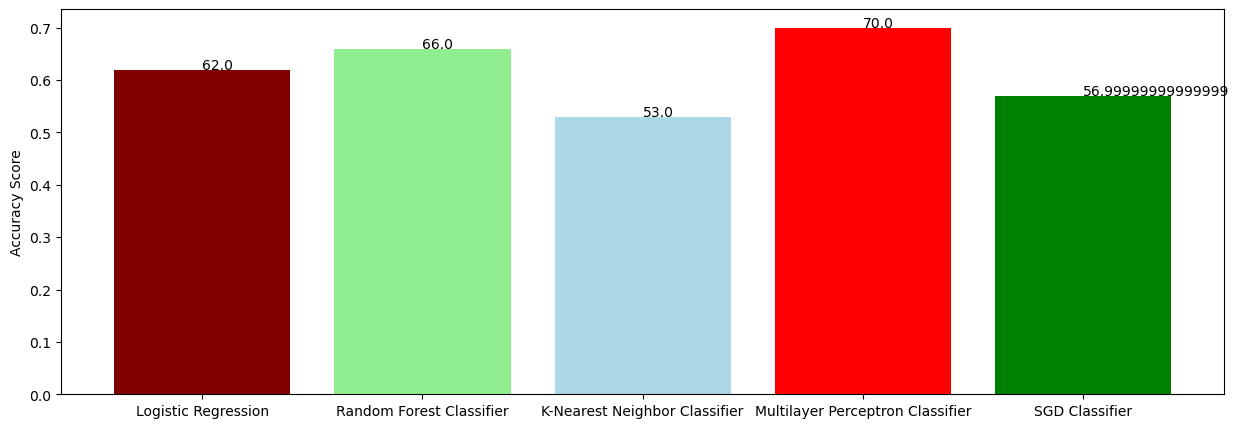

In [41]:
models = ['Logistic Regression', 'Random Forest Classifier', 
          'K-Nearest Neighbor Classifier', 'Multilayer Perceptron Classifier', 
          'SGD Classifier']

accuracy_scores = [round(logreg_accuracy, 2), round(rf_accuracy, 2), round(knn_accuracy, 2),
                  round(mlp_accuracy, 2), round(sgd_accuracy, 2)]

plt.figure(figsize=[15,5])
plt.bar(models, accuracy_scores, color=['maroon', 'lightgreen', 'lightblue', 'red', 'green'])

plt.ylabel('Accuracy Score')

for i in range(len(models)):
    plt.text(i,accuracy_scores[i], str(accuracy_scores[i]*100))

# Save the model to a file

In [42]:
with open('multiclassclf_mlp.pkl', 'wb') as f:
    pickle.dump(mlp_model, f)